In [58]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [59]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [61]:
[column.key for column in Measurement.__table__.columns]

['id', 'station', 'date', 'prcp', 'tobs']

In [92]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).\
                  order_by(Measurement.date).all()

In [93]:
#  3. Convert the June temperatures to a list.
june_temp = list(results)

In [94]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temp, columns=['June Temps'])
june_df

,June Temps
0,78.0
1,74.0
2,73.0
3,77.0
4,69.0
...,...
1695,81.0
1696,74.0
1697,75.0
1698,76.0


In [95]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [87]:
[column.key for column in Measurement.__table__.columns]

['id', 'station', 'date', 'prcp', 'tobs']

In [96]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).\
                  order_by(Measurement.date).all()

In [97]:
# 7. Convert the December temperatures to a list.
december_temp = list(results)

In [100]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_temp, columns=['December Temps'])
december_df

,December Temps
0,76.0
1,73.0
2,73.0
3,72.0
4,78.0
...,...
1512,66.0
1513,71.0
1514,72.0
1515,67.0


In [101]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [102]:
# Plots

<AxesSubplot:ylabel='Frequency'>

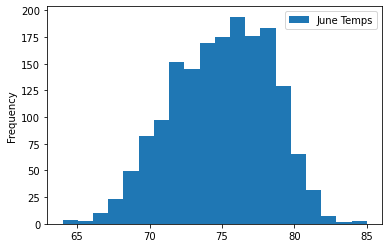

In [130]:
june_df.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

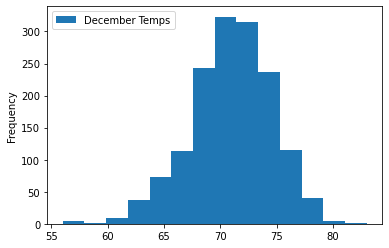

In [128]:
december_df.plot.hist(bins=14)